In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
X_train[0].shape

(28, 28)

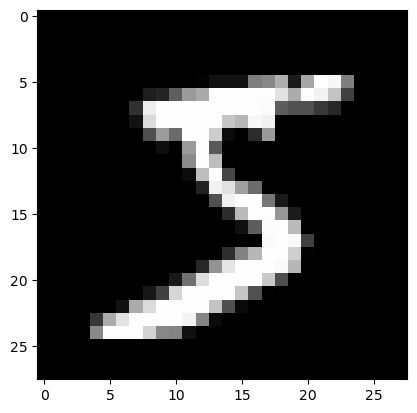

In [5]:
plt.imshow(X_train[0], cmap='gray')

In [6]:
y_train[0]

5

In [7]:
pd.Series(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [8]:
pd.Series(y_test).value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
dtype: int64

In [9]:
X_train = X_train/255
X_test = X_test/255

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train_1, X_train_2, y_train_1, y_train_2 = train_test_split(X_train, y_train, test_size=0.5, random_state=2019)

In [12]:
import time
import torch
from torch import nn
from torch.nn import CrossEntropyLoss

In [13]:
cnn = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=32, out_channels=32, kernel_size=5, padding=2),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Dropout(0.25),
                    nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
                    nn.ReLU(),
                    nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Dropout(0.25),
                    nn.Flatten(),
                    nn.Linear(64*7*7, 256),
                    nn.ReLU(),
                    nn.Dropout(0.5),
                    nn.Linear(256, 10))

In [14]:
batch_size = 1000
train_dataset_1 = torch.utils.data.TensorDataset(torch.tensor(X_train_1, dtype=torch.float32).unsqueeze(1),
                                               torch.tensor(y_train_1, dtype=torch.long))
train_loader_1 = torch.utils.data.DataLoader(train_dataset_1, batch_size=batch_size)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.long)

In [15]:
loss = CrossEntropyLoss(reduction='none')
lr = 0.01
optimizer = torch.optim.Adam(cnn.parameters(), lr=lr)

In [16]:
epochs = 30
train_losses = []
test_losses = []
for epoch in range(epochs):
    start = time.time()
    training_loss = 0
    for data, target in train_loader_1:
        optimizer.zero_grad()
        output = cnn(data)
        L = loss(output, target).sum()
        training_loss += L.item()
        L.backward()
        optimizer.step()
    
    test_softmax_coefficients = cnn(X_test)
    test_loss = torch.sum(loss(test_softmax_coefficients, y_test)).item()

    training_loss = training_loss / len(y_train_1)
    test_loss = test_loss / len(y_test)
    train_losses.append(training_loss)
    test_losses.append(test_loss)
    
    end = time.time()
    print("Epoch {}: Train_loss {}, Validation_loss {}, Seconds {}".format(epoch, training_loss, test_loss, end-start))

Epoch 0: Train_loss 2.3555175455729165, Validation_loss 1.44480419921875, Seconds 32.13189148902893
Epoch 1: Train_loss 0.6776656921386719, Validation_loss 0.341520263671875, Seconds 33.193506717681885
Epoch 2: Train_loss 0.2408000920613607, Validation_loss 0.17132069091796875, Seconds 31.05386447906494
Epoch 3: Train_loss 0.15947991536458334, Validation_loss 0.1280495849609375, Seconds 33.10535979270935
Epoch 4: Train_loss 0.13338237991333007, Validation_loss 0.12398404541015624, Seconds 33.592790842056274
Epoch 5: Train_loss 0.11116570561726888, Validation_loss 0.10820885009765625, Seconds 29.702150106430054
Epoch 6: Train_loss 0.0979627939860026, Validation_loss 0.0952625, Seconds 33.47145056724548
Epoch 7: Train_loss 0.08860799713134766, Validation_loss 0.094330810546875, Seconds 31.832964420318604
Epoch 8: Train_loss 0.0895068868001302, Validation_loss 0.08418948974609375, Seconds 28.46973752975464
Epoch 9: Train_loss 0.0782631322224935, Validation_loss 0.08668306274414063, Second

In [17]:
batch_size = 1000
train_dataset_2 = torch.utils.data.TensorDataset(torch.tensor(X_train_2, dtype=torch.float32).unsqueeze(1),
                                               torch.tensor(y_train_2, dtype=torch.long))
train_loader_2 = torch.utils.data.DataLoader(train_dataset_2, batch_size=batch_size)

In [18]:
epochs = 30
for epoch in range(epochs):
    start = time.time()
    training_loss = 0
    for data, target in train_loader_2:
        optimizer.zero_grad()
        output = cnn(data)
        L = loss(output, target).sum()
        training_loss += L.item()
        L.backward()
        optimizer.step()
    
    test_softmax_coefficients = cnn(X_test)
    test_loss = torch.sum(loss(test_softmax_coefficients, y_test)).item()

    training_loss = training_loss / len(y_train_2)
    test_loss = test_loss / len(y_test)
    train_losses.append(training_loss)
    test_losses.append(test_loss)
    
    end = time.time()
    print("Epoch {}: Train_loss {}, Validation_loss {}, Seconds {}".format(epoch, training_loss, test_loss, end-start))

Epoch 0: Train_loss 0.08007998797098796, Validation_loss 0.07438054809570313, Seconds 28.290226459503174
Epoch 1: Train_loss 0.07340308011372884, Validation_loss 0.0754154052734375, Seconds 28.347734689712524
Epoch 2: Train_loss 0.07454307556152344, Validation_loss 0.0627867919921875, Seconds 28.469634294509888
Epoch 3: Train_loss 0.06692062009175619, Validation_loss 0.06925175170898437, Seconds 28.967479944229126
Epoch 4: Train_loss 0.06684486325581869, Validation_loss 0.0607008056640625, Seconds 28.546621561050415
Epoch 5: Train_loss 0.06466704088846842, Validation_loss 0.06290498046875, Seconds 29.14832329750061
Epoch 6: Train_loss 0.06000880819956462, Validation_loss 0.0611522216796875, Seconds 28.4819495677948
Epoch 7: Train_loss 0.057881550470987954, Validation_loss 0.06975640869140624, Seconds 28.915809392929077
Epoch 8: Train_loss 0.06798692372639974, Validation_loss 0.0578310546875, Seconds 28.27006769180298
Epoch 9: Train_loss 0.059609248606363935, Validation_loss 0.058216296

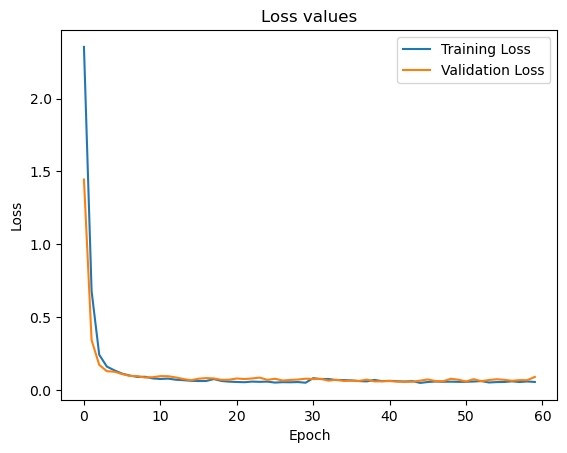

In [19]:
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss values")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [20]:
y_test_softmax_coefficients = cnn(X_test)
y_test_pred_proba = nn.Softmax(dim=1)(test_softmax_coefficients)
y_test_pred = torch.argmax(y_test_pred_proba, dim=1)

In [21]:
y_test = y_test.detach().numpy()
y_test_pred_proba = y_test_pred_proba.detach().numpy()
y_test_pred = y_test_pred.detach().numpy()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.96      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.96      0.98       982
           5       0.98      0.98      0.98       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [23]:
confusion_matrix(y_test,y_test_pred)

array([[ 954,    0,    5,    0,    0,    2,    8,    4,    1,    6],
       [   1, 1115,    6,    0,    1,    1,    2,    3,    6,    0],
       [   0,    0, 1022,    2,    0,    0,    0,    5,    3,    0],
       [   0,    0,    4,  996,    0,    2,    0,    3,    4,    1],
       [   0,    6,    3,    1,  946,    1,    6,    3,    4,   12],
       [   1,    0,    0,    9,    0,  876,    3,    0,    1,    2],
       [   5,    3,    1,    0,    1,    4,  942,    0,    2,    0],
       [   1,    1,   11,    7,    1,    0,    0,  997,    3,    7],
       [   1,    0,    8,    8,    0,    4,    5,    1,  940,    7],
       [   3,    3,    2,    4,    5,    6,    1,    6,    2,  977]],
      dtype=int64)

Text(0.5, 1.0, 'Receiver Operating Characteristic - PyTorch')

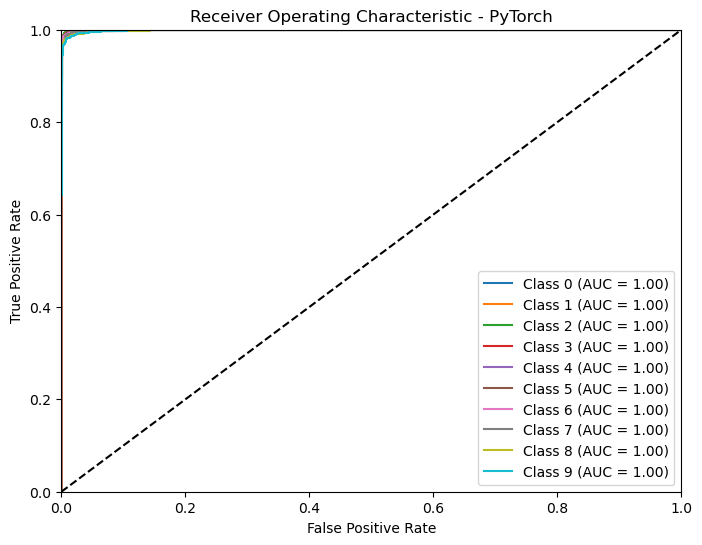

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(8, 6))
for class_idx in range(len(sorted(set(y_train)))):
    y_true = (y_test == sorted(set(y_train))[class_idx]).astype(int)
    y_pred_proba = y_test_pred_proba[:, class_idx]
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    plt.plot(fpr, tpr, label=f'Class {sorted(set(y_train))[class_idx]} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - PyTorch')